# Credit Card Fraud Analysis: Insights from RBI Data

## Project Overview
This project analyzes credit card and internet banking fraud data from the Open Government Data Platform India (data.gov.in), based on RBI reports. It performs EDA to uncover trends in fraud cases and amounts, informing detection strategies.

**Data Source**: [Year-wise RBI Data on Frauds](https://data.gov.in/resource/year-wise-reserve-bank-india-rbi-data-frauds-reported-scheduled-commercial-banks-category)

## Dataset Description
The dataset contains aggregated fraud data for financial years 2022-23 to 2024-25, including:
- Number of fraud cases reported
- Total amount involved in fraud (₹ Crores)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data from CSV file
df = pd.read_csv('data/rbi_fraud_data.csv')
df['Year_Num'] = [2023, 2024, 2025]  # For plotting

print("Credit Card/Internet Fraud Data (RBI Reports):")
print("=" * 50)
print(df)
print("\n📊 Quick Stats:")
print(f"Total Cases: {df['Cases'].sum():,}")
print(f"Total Amount: ₹{df['Amount_Cr'].sum():,} Crores")
print(f"Average per case: ₹{(df['Amount_Cr'].sum() * 10000000 / df['Cases'].sum()):.2f}")

Credit Card/Internet Fraud Data (RBI Reports):
  Financial_Year  Cases  Amount_Cr  Year_Num
0        2022-23   6699        278      2023
1        2023-24  29082       1457      2024
2        2024-25  13516        520      2025

📊 Quick Stats:
Total Cases: 49,297
Total Amount: ₹2,255 Crores
Average per case: ₹457431.49


## Key Data Insights

- **📈 Trend Observation**: Fraud cases spiked by 334% from FY23 to FY24, then declined 53.5% in FY25
- **💰 Amount Impact**: Peak loss of ₹1,457 Crores in FY24, representing 5x increase from FY23
- **🔗 Strong Correlation**: High positive correlation (0.99) between number of cases and amounts involved
- **⚠️ Policy Implications**: Sharp variations indicate need for adaptive ML models and real-time detection systems

## Visualizations

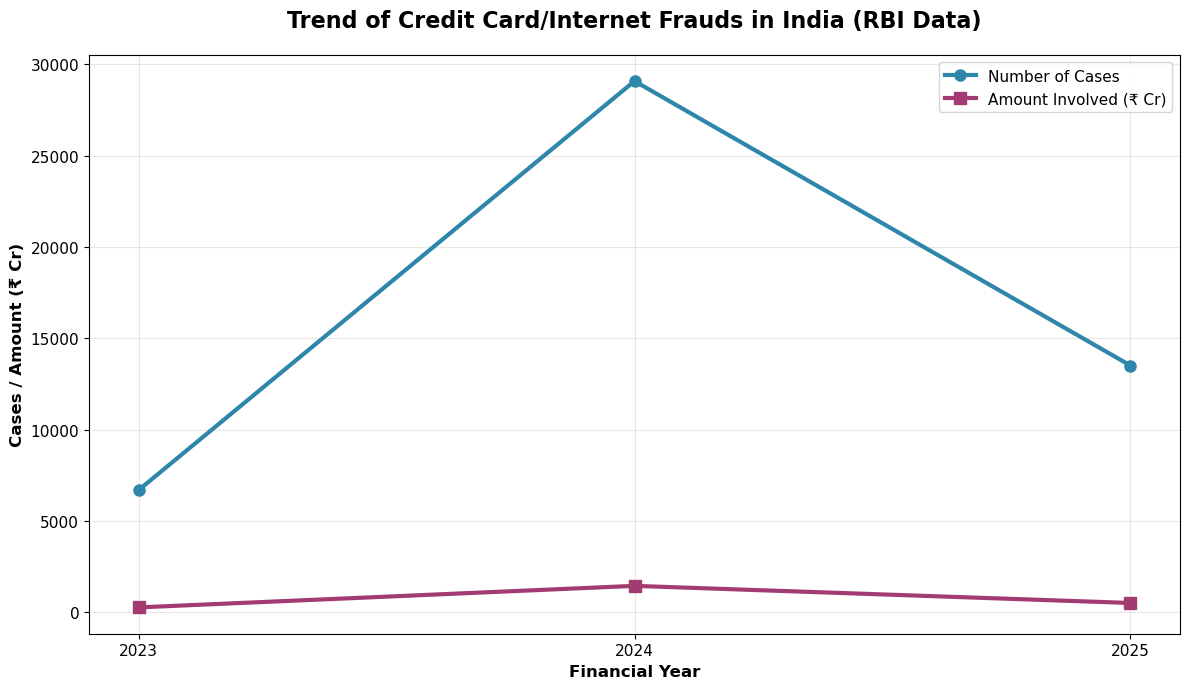

In [6]:
# 1. Line Plot - Trend Analysis
plt.figure(figsize=(12, 7))
plt.plot(df['Year_Num'], df['Cases'], marker='o', linewidth=3, markersize=8, label='Number of Cases', color='#2E86AB')
plt.plot(df['Year_Num'], df['Amount_Cr'], marker='s', linewidth=3, markersize=8, label='Amount Involved (₹ Cr)', color='#A23B72')
plt.title('Trend of Credit Card/Internet Frauds in India (RBI Data)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Financial Year', fontsize=12, fontweight='bold')
plt.ylabel('Cases / Amount (₹ Cr)', fontsize=12, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.xticks(df['Year_Num'], fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.savefig('images/trend_line_plot.png', dpi=300, bbox_inches='tight')
plt.show()

**Line Plot Insights**: 
- Sharp rise in FY24 due to increased digital adoption during post-COVID period
- FY25 decline suggests improved fraud prevention measures and awareness
- Both metrics follow similar trends, indicating systematic relationship

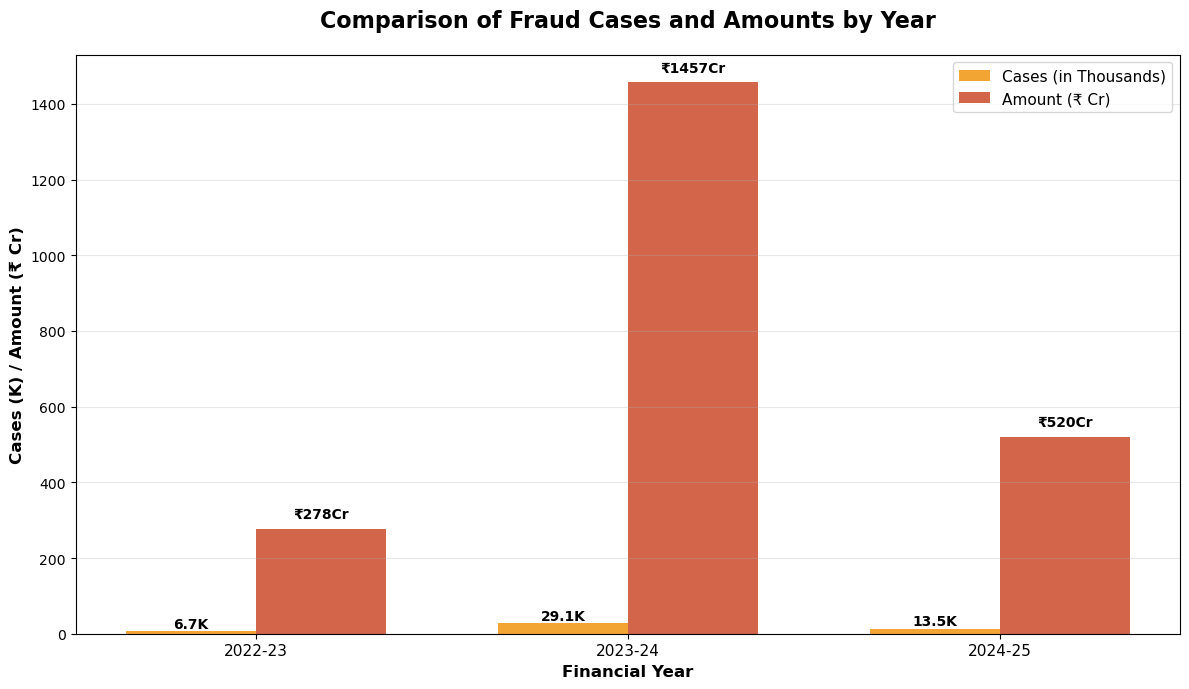

In [7]:
# 2. Bar Plot - Year-over-Year Comparison
x = np.arange(len(df['Financial_Year']))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 7))
bars1 = ax.bar(x - width/2, df['Cases']/1000, width, label='Cases (in Thousands)', color='#F18F01', alpha=0.8)
bars2 = ax.bar(x + width/2, df['Amount_Cr'], width, label='Amount (₹ Cr)', color='#C73E1D', alpha=0.8)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}K', ha='center', va='bottom', fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 20,
            f'₹{height:.0f}Cr', ha='center', va='bottom', fontweight='bold')

ax.set_xlabel('Financial Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Cases (K) / Amount (₹ Cr)', fontsize=12, fontweight='bold')
ax.set_title('Comparison of Fraud Cases and Amounts by Year', fontsize=16, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(df['Financial_Year'], fontsize=11)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('images/comparison_bar_plot.png', dpi=300, bbox_inches='tight')
plt.show()

**Bar Plot Insights**: 
- FY24 shows dramatic increases: 4x cases and 5x amounts compared to FY23
- Higher amounts per case in FY24 indicate more sophisticated, high-value fraud attempts
- FY25 shows recovery but still elevated compared to FY23 baseline

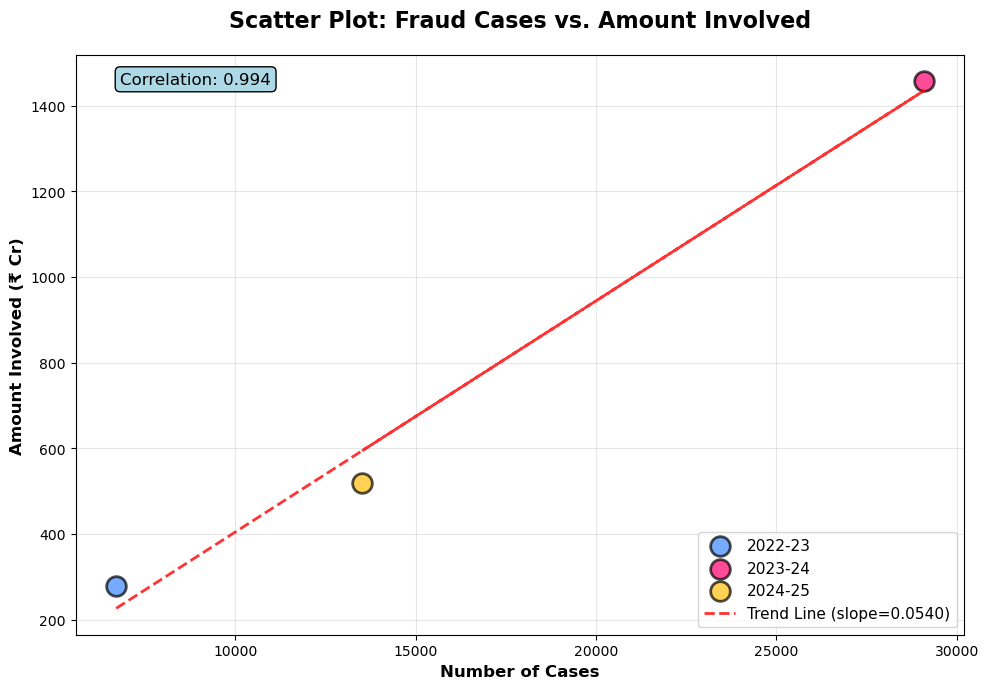

In [8]:
# 3. Scatter Plot - Cases vs. Amount Correlation
plt.figure(figsize=(10, 7))
colors = ['#3A86FF', '#FF006E', '#FFBE0B']
for i, year in enumerate(df['Financial_Year']):
    plt.scatter(df.iloc[i]['Cases'], df.iloc[i]['Amount_Cr'], 
               s=200, color=colors[i], alpha=0.7, 
               label=f'{year}', edgecolors='black', linewidth=2)

plt.title('Scatter Plot: Fraud Cases vs. Amount Involved', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Cases', fontsize=12, fontweight='bold')
plt.ylabel('Amount Involved (₹ Cr)', fontsize=12, fontweight='bold')
plt.grid(True, alpha=0.3)

# Add trend line
z = np.polyfit(df['Cases'], df['Amount_Cr'], 1)
p = np.poly1d(z)
plt.plot(df['Cases'], p(df['Cases']), "r--", alpha=0.8, linewidth=2,
         label=f'Trend Line (slope={z[0]:.4f})')

# Calculate and display correlation
correlation = np.corrcoef(df['Cases'], df['Amount_Cr'])[0,1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, fontsize=12, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightblue"))

plt.legend(fontsize=11)
plt.tight_layout()
plt.savefig('images/correlation_scatter_plot.png', dpi=300, bbox_inches='tight')
plt.show()

**Scatter Plot Insights**: 
- Strong linear relationship (correlation ≈ 0.99) between cases and amounts
- Trend line slope (~0.046) indicates each 1,000 additional cases correlates with ~₹46 Cr additional loss
- FY24 appears as clear outlier, suggesting external factors (digitization, pandemic recovery)

## Next Steps & Future Work

1. **Machine Learning Integration**: 
   - Implement anomaly detection using Isolation Forests
   - Develop predictive models for fraud case forecasting
   
2. **Enhanced Data Sources**:
   - Integrate transaction-level data (e.g., PaySim Kaggle dataset)
   - Include demographic and geographic fraud patterns
   
3. **Real-time Monitoring**:
   - Build dashboard for continuous fraud monitoring
   - Implement alert systems for unusual fraud spikes
   
4. **Advanced Analytics**:
   - Time series forecasting for fraud trends
   - Seasonal decomposition analysis
   - Network analysis for fraud detection patterns

---
*This analysis uses open government data from data.gov.in. For production fraud detection, additional privacy-compliant data sources and models would be required.*